In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#Extracting categorical data
categorical_cols = df.select_dtypes(include='object').columns

In [5]:
categorical_cols


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [6]:
for i in categorical_cols: 
    print(df[i].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [7]:
df.isnull().sum()#checking null value if exist

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
import seaborn as sns

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

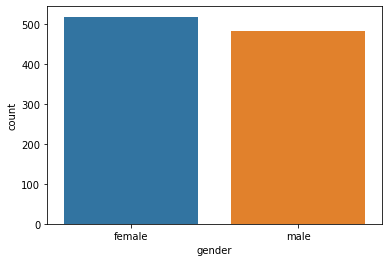

In [9]:
sns.countplot(df['gender'])

In [10]:
count_test = df['test preparation course'].value_counts()

In [11]:
count_test

none         642
completed    358
Name: test preparation course, dtype: int64

In [12]:
labels = df['test preparation course'].value_counts().index

In [13]:
labels

Index(['none', 'completed'], dtype='object')

In [14]:
plt.figure(figsize= (10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

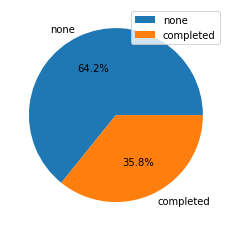

In [15]:
plt.pie(count_test,labels=labels,autopct='%1.1f%%')
plt.legend(labels)
plt.show()

In [16]:
marks=df.select_dtypes(include='int').columns

In [17]:
marks


Index(['math score', 'reading score', 'writing score'], dtype='object')

In [18]:
for i in marks:
    if(df[i].all()<100):
        print("yes")#it means all the values are less than 100

yes
yes
yes


In [19]:
df['performance']=((df['math score']+df['reading score']+df['writing score'])/300)*100

In [20]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


<AxesSubplot:xlabel='performance', ylabel='math score'>

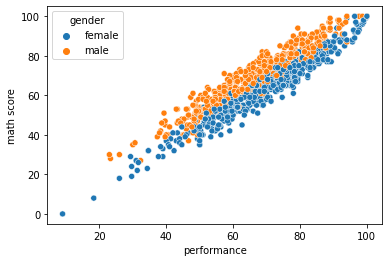

In [21]:
sns.scatterplot(x=df['performance'],y=df['math score'],hue=df['gender'])

<AxesSubplot:xlabel='performance', ylabel='reading score'>

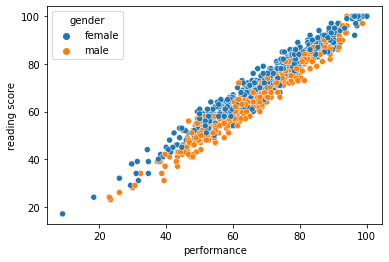

In [22]:
sns.scatterplot(x=df['performance'],y=df['reading score'],hue=df['gender'])

In [23]:
gender = {
    'male':1,
    'female':0
}
race = {
    'group A':0,
    'group B':1,
    'group C':2,
    'group D':3,
    'group E':4
}

In [24]:
df['gender']=df['gender'].map(gender)
df['race/ethnicity']=df['race/ethnicity'].map(race)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,performance
0,0,1,bachelor's degree,standard,none,72,72,74,72.666667
1,0,2,some college,standard,completed,69,90,88,82.333333
2,0,1,master's degree,standard,none,90,95,93,92.666667
3,1,0,associate's degree,free/reduced,none,47,57,44,49.333333
4,1,2,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,master's degree,standard,completed,88,99,95,94.000000
996,1,2,high school,free/reduced,none,62,55,55,57.333333
997,0,2,high school,free/reduced,completed,59,71,65,65.000000
998,0,3,some college,standard,completed,68,78,77,74.333333


In [25]:
level = {
    "bachelor's degree":0,
    'some college':1,
    "master's degree":2,
    "associate's degree":3,
    "high school":4,
    "some high school":5
}

In [26]:
df['parental level of education']=df['parental level of education'].map(level)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,performance
0,0,1,0,standard,none,72,72,74,72.666667
1,0,2,1,standard,completed,69,90,88,82.333333
2,0,1,2,standard,none,90,95,93,92.666667
3,1,0,3,free/reduced,none,47,57,44,49.333333
4,1,2,1,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,2,standard,completed,88,99,95,94.000000
996,1,2,4,free/reduced,none,62,55,55,57.333333
997,0,2,4,free/reduced,completed,59,71,65,65.000000
998,0,3,1,standard,completed,68,78,77,74.333333


In [27]:
df = pd.get_dummies(df,drop_first=True)
x = df.drop(columns='performance').values
y = df['performance'].values

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [29]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [30]:
predictions=model.predict(x_test)

In [31]:
predictions

array([68.73333333, 77.25666667, 45.06      , 68.06      , 74.09333333,
       73.03      , 69.85333333, 43.90666667, 86.94666667, 38.28666667,
       51.76666667, 64.81666667, 82.27666667, 80.84666667, 54.04666667,
       39.79333333, 52.90333333, 86.49      , 53.18333333, 79.53      ,
       62.67      , 55.46333333, 76.58333333, 61.11333333, 47.91666667,
       64.23333333, 58.81333333, 48.87666667, 63.41666667, 82.38      ,
       79.37      , 89.10666667, 89.21333333, 56.56333333, 54.79666667,
       83.90333333, 96.97333333, 58.91333333, 71.87666667, 72.14      ,
       68.45333333, 57.07      , 70.29      , 71.95      , 78.55333333,
       58.37      , 85.18666667, 61.53333333, 84.        , 58.13      ,
       38.74333333, 62.76333333, 49.14666667, 57.03666667, 40.01      ,
       70.58      , 52.56666667, 64.32666667, 77.94      , 61.        ,
       67.65      , 77.41333333, 50.19666667, 71.59333333, 65.55333333,
       64.59666667, 71.94333333, 51.55666667, 67.16      , 55.06

In [32]:
from sklearn.metrics import r2_score
print(r2_score(predictions,y_test))

0.9972393572456081
